In [92]:
import nltk
import pandas as pd
from pandas import DataFrame, Series
import PyPDF2
from PyPDF2 import PdfFileReader


import requests
import regex as re
import datetime
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [24]:
meeting = DataFrame(pd.read_csv("Board Committee Commission Meeting Data.csv"))
agendas = meeting['Agenda_Link']
notes = meeting['Minutes_Link']

In [25]:
for i in range(len(meeting)):
    new = re.sub(r"\s", "", meeting['Meeting_ID'][i])
    meeting['Meeting_ID'][i] = new

<ipython-input-25-77a6d85d7f34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meeting['Meeting_ID'][i] = new


In [34]:
for i, url in enumerate(agendas):
    try:
        r = requests.get(url)
        r.raise_for_status()
    except Exception:
        continue
    text = "pdf_agendas/{}.pdf"
    with open(text.format(meeting.iloc[i,0]),'wb') as f:
        f.write(r.content)

In [26]:
meeting['Duration_minutes'] = meeting['Duration']

In [27]:
for i in range(len(meeting['Duration'])):
    time = re.split(':',meeting['Duration'][i])
    time = [int(x) for x in time]
    seconds = time[0]*60 + time[1] + time[0]/60
    meeting.iloc[i,10] = seconds

In [28]:
meeting

,Meeting_ID,Topic,Scheduled_Start_Time,Zoom_Meeting_Start_Time,Zoom_Meeting_End_Time,Duration,Participants,Recording,Agenda_Link,Minutes_Link,Duration_minutes
0,954410442,CCEC,4:30:00 PM,3/31/2020 15:40,6:27 PM,2:47:55,52,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,167.033
1,531697510,Common Council,6:30:00 PM,3/31/2020 17:04,02:53 AM(Next day),9:48:36,337,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,588.15
2,411578576,"Finance Committee: Meeting of April 6, 2020",4:30:00 PM,4/6/2020 15:40,5:49 PM,2:09:00,31,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,129.033
3,563608269,"CCEC: Meeting of April 9, 2020",6:00:00 PM,4/9/2020 16:57,7:53 PM,2:56:08,36,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,176.033
4,468948855,"Plan Commission: Meeting of April 13, 2020",5:30:00 PM,4/13/2020 16:35,9:14 PM,4:38:54,80,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,278.067
...,...,...,...,...,...,...,...,...,...,...,...
150,93491014777,Public Safety Review Committee Budget Subcommi...,NaN,7/29/2020 17:46,8:17 PM,2:30:50,21,Yes,NaN,NaN,150.033
151,98563848547,"Plan Commission: Meeting of July 30, 2020",5:00:00 PM,7/30/2020 15:58,8:06 PM,4:08:29,54,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,248.067
152,99885787121,Body-Worn Camera Feasibility Review Committee:...,5:30:00 PM,7/30/2020 17:06,7:35 PM,2:28:11,23,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,148.033
153,94972195424,Task Force on Municipal Golf in Madison Parks:...,6:00:00 PM,7/30/2020 17:35,8:24 PM,2:49:27,81,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,169.033


Coef: [0.33873689]
Intercept: -10.849966498419846
Number of Participants ~= 0.3387368917661893*Duration_minutes + -10.849966498419846


Text(0.5, 1.0, 'Participants by Meeting Duration')

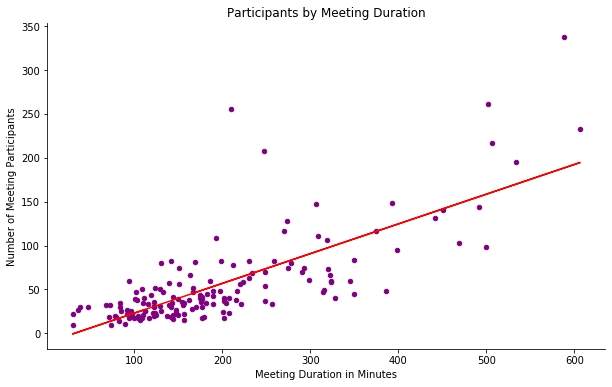

In [85]:
fig, ax = plt.subplots(figsize = (10,6))
meeting.plot.scatter(x='Duration_minutes', y = 'Participants', ax=ax, color='purple')

X=meeting['Duration_minutes'].values.reshape(-1, 1)
y=meeting['Participants'].values

r = LinearRegression()
r.fit(X, y)
plt.plot(X, model.predict(X),color='r')

print("Coef:", r.coef_)
print("Intercept:", r.intercept_)

def formula(reg, columns):
    rv = ""
    for i in range(len(columns)):
        rv += "{}*{} + ".format(reg.coef_[0], columns[i])
    rv += str(r.intercept_)
    return rv

print("Number of Participants ~= " + formula(r, ['Duration_minutes']))

ax.set_xlabel("Meeting Duration in Minutes")
ax.set_ylabel("Number of Meeting Participants")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Participants by Meeting Duration')

In [91]:
meeting.sort_values(by=['Participants'], ascending=False).head(10)['Topic']

1                                         Common Council
19              Plan Commission: Meeting of May 11, 2020
105    Madison Public Library Board: Special Meeting ...
85      Urban Design Commission: Meeting of July 1, 2020
25              Plan Commission: Meeting of May 18, 2020
89     Madison Public Library Board: Meeting of July ...
130             Common Council: Meeting of July 21, 2020
13                               Urban Design Commission
57              Common Council: Meeting of June 16, 2020
77              Plan Commission Meeting of June 29, 2020
Name: Topic, dtype: object

In [108]:
def get_info(path):
    with open(path, 'rb') as f:
        pdf = PdfFileReader(f, strict='False')
        info = pdf.getDocumentInfo()
        number_of_pages = pdf.getNumPages()
    
    print(info)
    author = info.author
    creator = info.creator
    producer = info.producer
    subject = info.subject
    title = info.title
get_info('pdf_agendas/'+meeting['Meeting_ID'][i]+'.pdf')

{'/ModDate': "D:20200730132634-04'00'", '/Producer': 'PDFlib PLOP 4.1 (.NET/Win64)/Powered By Crystal', '/Author': 'Legistar', '/Title': 'Agenda', '/Creator': 'Crystal Reports'}


In [112]:
def text_extractor(path):
    with open(path, 'rb') as f:
        pdf = PdfFileReader(f, strict='False')
        # get the first page
        page = pdf.getPage(0)
        print(page)
        print('Page type: {}'.format(str(type(page))))
        text = page.extractText()
        print(text)

text_extractor('pdf_agendas/'+meeting['Meeting_ID'][i]+'.pdf')

{'/Type': '/Page', '/Resources': IndirectObject(17, 0), '/CropBox': [0, 0, 612, 792], '/MediaBox': [0, 0, 612, 792], '/Parent': IndirectObject(10, 0), '/Contents': [IndirectObject(40, 0)]}
Page type: <class 'PyPDF2.pdf.PageObject'>
DEFERRED COMPENSATION COMMITTEECity of MadisonAgenda - AmendedCity of MadisonMadison, WI  53703www.cityofmadison.comConsider: Who benefits?  Who is burdened?Who does not have a voice at the table?How can policymakers mitigate unintended consequences?Virtual1:30 PMFriday, July 31, 2020The City of Madison is holding the Deferred Compensation Committee meeting virtually to help protect our community from the Coronavirus (COVID-19) pandemic.1.               Written Comments: You can send comments on agenda items to hr@cityofmadison.com.2.Public Registration: You can register your support or opposition to an agenda item at https://www.cityofmadison.com/MeetingRegistration. If you wish to speak at the virtual meeting on an agenda item, you must register. When you 